<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

- 50,000 highly polarized revies
- 25,000 reviews for training, and 25,000 reviews for testing
- each set consisting of 50% negatvie and 50% positive reviews


**Loading the IMDB dataset**

In [8]:
import numpy as np
import pandas as pd

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)    # 10,000 frequently used words

17473536/17464789 [==============================] - 0s 0us/step


In [14]:
len(train_data)

25000

In [11]:
train_data[0]   # first dataset in train_data

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [12]:
train_labels[0]

1

In [16]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [19]:
[i*2 for i in range(3)]     # list compression

[0, 2, 4]

In [20]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [21]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [25]:
train_data[0][:5]

[1, 14, 22, 16, 43]

In [28]:
[reverse_word_index.get(22 - 3, "?")]

['film']

In [17]:
word_index = imdb.get_word_index()    # word_index is a dictionary mapping words to an integer index.
reverse_word_index = dict(            # reverse_word : reverses it, mapping integer indices to words.
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])    # reverse_word_index.get : if corresponding, pick that word. Else, save "?"

1654784/1641221 [==============================] - 0s 0us/step


In [18]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [31]:
len(train_data[0])

218

In [32]:
len(train_data[1])          # train_data의 원소들끼리의 길이가 다르다?! -> one-hot encoding 필요

189

In [33]:
train_data[0][:8]         # this is one of our sequences

[1, 14, 22, 16, 43, 530, 973, 1622]

In [34]:
train_data[0][0] 

1

In [35]:
train_data[0][1] 

14

In [36]:
train_data[0][2] 

22

In [29]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))     # creates an all-zero matrix of shape (len(sequences),dimension)
    for i, sequence in enumerate(sequences):
        for j in sequence:                              # for j in sequence : j까지 모든 입력값에 1이 들어감
            results[i, j] = 1.                          # sets specific indices of result[i] to 1s      # 글자가 있을 경우 0이 아닌 1 출력
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [37]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [38]:
len(x_train[0])

10000

In [39]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [40]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),              # relu = max(0,x)
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")             # (-무한대,무한대) -> [0,1)]        # 0~1 사이의 연속적인 실수
])

**Compiling the model**

In [41]:
model.compile(optimizer="rmsprop",
              # RMSprop(1r=0.001),
              loss="binary_crossentropy",           # compete loss by using binary crossentropy
              metrics=["accuracy"])                 # keras 사용함으로써 간단하게 표현 가능

### Validating your approach

**Setting aside a validation set**

In [42]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [43]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 45ms/step - loss: 0.5400 - accuracy: 0.7845 - val_loss: 0.4283 - val_accuracy: 0.8433
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3346 - accuracy: 0.8972 - val_loss: 0.3234 - val_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2410 - accuracy: 0.9217 - val_loss: 0.2845 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1894 - accuracy: 0.9373 - val_loss: 0.2746 - val_accuracy: 0.8914
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1557 - accuracy: 0.9504 - val_loss: 0.2777 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1294 - accuracy: 0.9597 - val_loss: 0.2894 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1077 - accuracy: 0.9671 - val_loss: 0.3034 - val_accuracy: 0.8860
Epoch 8/20
30

In [44]:
history_dict = history.history      # history의 history has dictionary informations
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
history_dict['loss']                # let's plot

[0.5399524569511414,
 0.334562212228775,
 0.24104419350624084,
 0.18938104808330536,
 0.15571829676628113,
 0.1293790638446808,
 0.1076580211520195,
 0.09046665579080582,
 0.07264675199985504,
 0.06279457360506058,
 0.04850485920906067,
 0.03908354789018631,
 0.030801676213741302,
 0.02362579107284546,
 0.020580189302563667,
 0.012353490106761456,
 0.011883915401995182,
 0.00797472894191742,
 0.00484384736046195,
 0.004004501271992922]

**Plotting the training and validation loss**

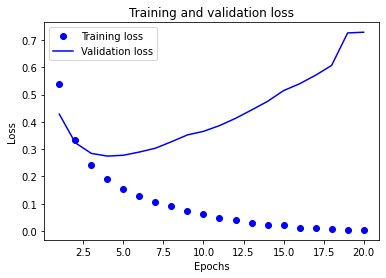

In [46]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")              # xaxis
plt.plot(epochs, val_loss_values, "b", label="Validation loss")         # yaxis
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

- training loss always going down, since we are optimizing our models.
- BUT validation loss is increasing, not a good validation sets.

**Plotting the training and validation accuracy**

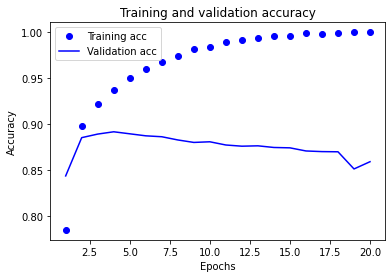

In [47]:
# accuracy result

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- stop our training at epoch #4

**Retraining a model from scratch**

In [48]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4856 - accuracy: 0.8240
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2873 - accuracy: 0.9058
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2150 - accuracy: 0.9260
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2942 - accuracy: 0.8820


In [49]:
results                   #(the  test loss, the test accuracy)

[0.2942275106906891, 0.8820400238037109]

### Using a trained model to generate predictions on new data

In [50]:
model.predict(x_test)

array([[0.30195603],
       [0.99956137],
       [0.96477616],
       ...,
       [0.14190184],
       [0.13373707],
       [0.6508374 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [52]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(             # downloading our data
    num_words=10000)

In [53]:
len(train_data)

8982

In [54]:
len(test_data)

2246

In [55]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [56]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [57]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [58]:
train_labels[10]                # label info of first data

3

### Preparing the data

**Encoding the input data**

In [59]:
x_train = vectorize_sequences(train_data)           # vectorized training data
x_test = vectorize_sequences(test_data)             # vectorized test data

In [61]:
x_train.shape                                       # all the data becomes to have the same length.

(8982, 10000)

**Encoding the labels**

In [62]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [63]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)                  # vectorized training labels
y_test = to_one_hot(test_labels)                    # vectorized test labels

In [65]:
y_train[2]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from tensorflow.keras.utils import to_categorical                 # to_one_hot 함수 만드는 대신에 to_categorical 함수 사용 가능
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [67]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")              # need to specify loss by categorical crossentropy
])

**Compiling the model**

In [68]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [69]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [70]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 2.5948 - accuracy: 0.5195 - val_loss: 1.7206 - val_accuracy: 0.6230
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4130 - accuracy: 0.7040 - val_loss: 1.2948 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0440 - accuracy: 0.7774 - val_loss: 1.1329 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8148 - accuracy: 0.8316 - val_loss: 1.0194 - val_accuracy: 0.7920
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6497 - accuracy: 0.8675 - val_loss: 1.0137 - val_accuracy: 0.7750
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5217 - accuracy: 0.8941 - val_loss: 0.9034 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4142 - accuracy: 0.9149 - val_loss: 0.8969 - val_accuracy: 0.8060
Epoch 8/20
16


**Plotting the training and validation loss**

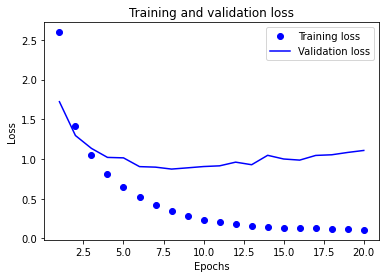

In [71]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

- need to stop our training at epoch # 9.

**Plotting the training and validation accuracy**

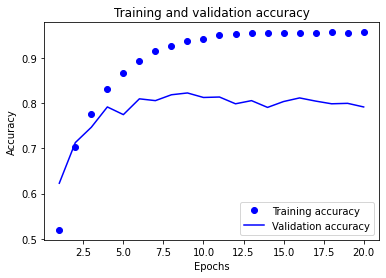

In [72]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [73]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,                                   # train our model at epochs # 9.
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.6422 - accuracy: 0.5197
Epoch 2/9
18/18 [==============================] - 0s 15ms/step - loss: 1.3952 - accuracy: 0.7172
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 1.0174 - accuracy: 0.7835
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7884 - accuracy: 0.8318
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6210 - accuracy: 0.8696
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4918 - accuracy: 0.8967
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3967 - accuracy: 0.9156
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3210 - accuracy: 0.9303
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9641 - accuracy: 0.7894


In [74]:
results                                               # accuracy : approxiately 79.7%

[0.9640682935714722, 0.7894033789634705]

- model accuracy is about 80%.

In [75]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.17809439002671415

### Generating predictions on new data

In [76]:
predictions = model.predict(x_test)

In [78]:
predictions[0]

array([9.1765605e-06, 3.7720645e-05, 9.5636415e-06, 9.6329492e-01,
       2.0806877e-02, 6.9993116e-06, 2.4335310e-07, 1.8830007e-04,
       1.4992546e-03, 2.5851225e-05, 1.9400923e-04, 5.1567820e-04,
       6.3828033e-05, 2.6420178e-04, 5.4772157e-05, 2.0390869e-06,
       9.1548834e-04, 5.1915726e-05, 5.5977009e-05, 3.0380799e-04,
       9.1743702e-03, 1.6957611e-03, 4.1354897e-06, 3.9187409e-05,
       2.4844363e-05, 4.8882575e-05, 1.0917631e-06, 1.3167677e-05,
       5.2317471e-05, 3.9474089e-05, 2.2846372e-05, 4.0923610e-06,
       5.7059583e-06, 6.4055876e-06, 1.6213371e-04, 1.2381418e-05,
       8.9065739e-05, 1.2403005e-04, 3.5415590e-06, 8.4827523e-05,
       2.3454520e-05, 1.9228512e-06, 3.5499584e-06, 5.9437723e-05,
       7.4961321e-07, 1.9789495e-06], dtype=float32)

In [77]:
predictions[0].shape

(46,)

In [79]:
np.sum(predictions[0])

1.0000001

In [80]:
np.argmax(predictions[0])             # 3번째 predictions이 최댓값을 반환함.

3

### A different way to handle the labels and the loss

In [81]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [82]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [83]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",             # y_train이 list이므로 sparse 사용
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [87]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 3.2603 - accuracy: 0.1864 - val_loss: 2.7447 - val_accuracy: 0.3540
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 2.3037 - accuracy: 0.4387 - val_loss: 2.0335 - val_accuracy: 0.5420
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.7662 - accuracy: 0.5525 - val_loss: 1.7464 - val_accuracy: 0.5510
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.5818 - accuracy: 0.5499 - val_loss: 1.7006 - val_accuracy: 0.5530
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.4994 - accuracy: 0.5524 - val_loss: 1.6899 - val_accuracy: 0.5530
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 1.4416 - accuracy: 0.5594 - val_loss: 1.6730 - val_accuracy: 0.5540
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 1.3939 - accuracy: 0.5656 - val_loss: 1.6659 - val_accuracy: 0.5630
Epoch 8/20
63/63 [=

- not that good validation set since validation accuracy is low with 60%.

The model now peaks at ~71% validation accuracy, an 8% absolute drop.

## Exercises by professor

- Try using larer or smaller layers
_ Try using a single hidden layer, or three hidden layers

--------------------------------------------------


### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [88]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [89]:
train_data.shape

(404, 13)

In [90]:
test_data.shape

(102, 13)

In [91]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [92]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

#### WHY NORMALIZE?

- gradient of larger parameter dominates the updatae
- both parameters an be updated in equal proportions

### Building your model

**Model definition**

In [93]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [94]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")                                                  # prepares the validation data : data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(                                            # prepares the training data : data from all other partitions
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()                                                           # build the Keras model(already compiled)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)                          # trains the model (in silent mode, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [95]:
all_scores

[1.8750097751617432, 2.206282615661621, 2.4414710998535156, 2.3453423976898193]

In [96]:
np.mean(all_scores)                                                                  # final mae is the average of all maes

2.217026472091675

**Saving the validation logs at each fold**

In [97]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [99]:
len(all_mae_histories)

4

In [100]:
len(all_mae_histories[0])

500

**Building the history of successive mean K-fold validation scores**

In [98]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]          # for all_mae_histories, take mean of each components

In [101]:
len(average_mae_history)

500

**Plotting validation scores**

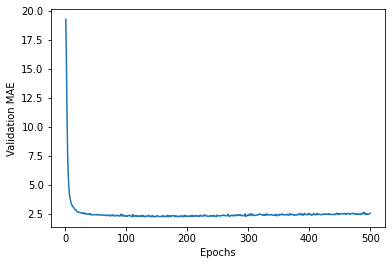

In [104]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

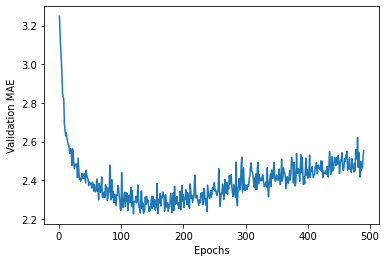

In [105]:
truncated_mae_history = average_mae_history[10:] 
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

- Validation MAE stops improving significantly after 120-149 epochs.

**Training the final model**

In [106]:
model = build_model()                                                                 # gets a fresh, compiled model
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 17.5708 - mae: 2.7072


In [107]:
test_mae_score

2.70719313621521

### Generating predictions on new data

In [108]:
predictions = model.predict(test_data)
predictions[0]

array([8.523909], dtype=float32)

In [110]:
test_targets[0]

7.2

## Exercises
- Try varying the number of layers in the model
- Try varying the number of units per layer

### Wrapping up

## Summary